In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import re, os
import matplotlib.pyplot as plt
%matplotlib inline

Set `projdir` on your system, then everything else is defined relative to that. `pwd` will just give the directory that this Jupyter notebook is housed in.

In [2]:
projdir = os.getcwd()
datdir = projdir + "/ciam-code/output/MonteCarlo"
plotdir = projdir + "/ciam-code/figures"

If the plot directory `plotdir` doesn't exist, make it.

In [3]:
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
print("Will save plots to ",plotdir)

Will save plots to  /Users/aewsma/codes/CIAM_adaptation_regimes/ciam-code/figures


## Read Monte Carlo simulation results

### 5th, 50th and 95th percentiles only (single simulations)

In [4]:
df05 = pd.read_csv(datdir+"/SSP5_BRICK85_p05/CIAM 2021-07-13 06-39-17 MC1/PostProcessing/globalnpv_SSP5_BRICK85_p05.csv")
df50 = pd.read_csv(datdir+"/SSP5_BRICK85_p50/CIAM 2021-07-13 06-39-48 MC1/PostProcessing/globalnpv_SSP5_BRICK85_p50.csv")
df95 = pd.read_csv(datdir+"/SSP5_BRICK85_p95/CIAM 2021-07-13 06-40-18 MC1/PostProcessing/globalnpv_SSP5_BRICK85_p95.csv")

In [5]:
df05r = pd.read_csv(datdir+"/SSP5_BRICK85_p05/CIAM 2021-07-13 06-39-17 MC1/PostProcessing/regionnpv_SSP5_BRICK85_p05.csv")
df50r = pd.read_csv(datdir+"/SSP5_BRICK85_p50/CIAM 2021-07-13 06-39-48 MC1/PostProcessing/regionnpv_SSP5_BRICK85_p50.csv")
df95r = pd.read_csv(datdir+"/SSP5_BRICK85_p95/CIAM 2021-07-13 06-40-18 MC1/PostProcessing/regionnpv_SSP5_BRICK85_p95.csv")
regions = df05r.columns

In [6]:
df05 = df05.join(df05r)
df50 = df50.join(df50r)
df95 = df95.join(df95r)

### SLR uncertainty only

In [7]:
slrdir = datdir + "/SSP5_BRICK85_varyBRICK/CIAM 2021-07-12 23-44-50 MC1000/PostProcessing"
dfS = pd.read_csv(slrdir+"/globalnpv_SSP5_BRICK85_varyBRICK.csv")
dfS = dfS.join(pd.read_csv(slrdir+"/regionnpv_SSP5_BRICK85_varyBRICK.csv"))

### CIAM socioeconomic parameter uncertainty only

In [8]:
ciamdir = datdir + "/SSP5_BRICK85_varyCIAM/CIAM 2021-07-12 17-00-32 MC1000/PostProcessing"
dfC = pd.read_csv(ciamdir+"/globalnpv_SSP5_BRICK85_varyCIAM.csv")
dfC = dfC.join(pd.read_csv(ciamdir+"/regionnpv_SSP5_BRICK85_varyCIAM.csv"))

### Both SLR and CIAM uncertainty

In [9]:
bothdir = datdir + "/SSP5_BRICK85_varySLR_varyCIAM/CIAM 2021-07-12 10-30-44 MC1000/PostProcessing"
dfSC = pd.read_csv(bothdir+"/globalnpv_SSP5_BRICK85_varySLR_varyCIAM.csv")
dfSC = dfSC.join(pd.read_csv(bothdir+"/regionnpv_SSP5_BRICK85_varySLR_varyCIAM.csv"))

### Histogram

KDE version

In [10]:
kde = {}
kde["S"] = stats.gaussian_kde(dfS.npv)
kde["C"] = stats.gaussian_kde(dfC.npv)
kde["SC"] = stats.gaussian_kde(dfSC.npv)

x = np.linspace(0,12000,500)
kde_plot = {}
for k in kde.keys():
    kde_plot[k] = kde[k](x)

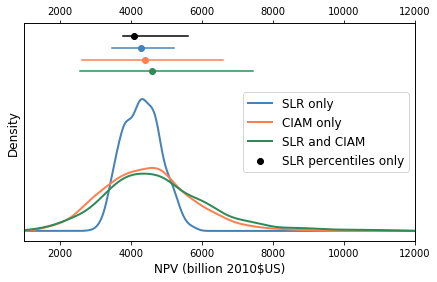

In [11]:
fig, ax = plt.subplots(1,1,figsize=(7,4))
plt.plot(x,kde_plot["S"], linewidth=2, color="steelblue", label="SLR only")
plt.plot(x,kde_plot["C"], linewidth=2, color="coral", label="CIAM only")
plt.plot(x,kde_plot["SC"], linewidth=2, color="seagreen", label="SLR and CIAM")
y0 = 0.001; dy = 0.00006
plt.plot([df05.npv, df95.npv], [y0, y0], color="black"); plt.scatter(df50.npv, y0, color="black", label="SLR percentiles only")
y0 -= dy
plt.plot([dfS.npv.quantile(0.05), dfS.npv.quantile(0.95)], [y0, y0], color="steelblue"); plt.scatter(dfS.npv.median(), y0, color="steelblue")
y0 -= dy
plt.plot([dfC.npv.quantile(0.05), dfC.npv.quantile(0.95)], [y0, y0], color="coral"); plt.scatter(dfC.npv.median(), y0, color="coral")
y0 -= dy
plt.plot([dfSC.npv.quantile(0.05), dfSC.npv.quantile(0.95)], [y0, y0], color="seagreen"); plt.scatter(dfSC.npv.median(), y0, color="seagreen")
plt.xlabel("NPV (billion 2010$US)", fontsize=12); plt.ylabel("Density", fontsize=12); plt.yticks([])
plt.xlim([1000,12000])
plt.legend(fontsize=12, frameon=True)
ax1 = plt.gca()
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
fig.savefig(plotdir+"/global_damages_ssp5-rcp85.pdf", bbox_inches='tight');

In [12]:
print("5th, 50th, 95th, and 95-5th percentiles")
print("Percentiles only:      ",np.transpose(np.round([df05.npv, df50.npv, df95.npv, df95.npv-df05.npv], 2))[0])
print("SLR-only ensemble:     ",np.round([dfS.npv.quantile(.05), dfS.npv.quantile(.5), dfS.npv.quantile(.95), dfS.npv.quantile(.95)-dfS.npv.quantile(.05)], 2))
print("CIAM-only ensemble:    ",np.round([dfC.npv.quantile(.05), dfC.npv.quantile(.5), dfC.npv.quantile(.95), dfC.npv.quantile(.95)-dfC.npv.quantile(.05)], 2))
print("SLR and CIAM ensemble: ",np.round([dfSC.npv.quantile(.05), dfSC.npv.quantile(.5), dfSC.npv.quantile(.95), dfSC.npv.quantile(.95)-dfSC.npv.quantile(.05)], 2))

5th, 50th, 95th, and 95-5th percentiles
Percentiles only:       [3769.66 4085.22 5623.94 1854.28]
SLR-only ensemble:      [3479.82 4297.42 5214.92 1735.1 ]
CIAM-only ensemble:     [2619.54 4409.53 6609.7  3990.17]
SLR and CIAM ensemble:  [2564.58 4593.19 7446.77 4882.19]


Histogram version

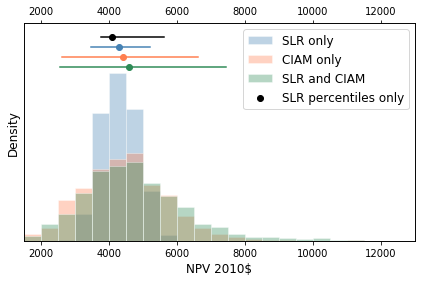

In [13]:
fig, ax = plt.subplots(1,1,figsize=(7,4))
plt.hist(dfS.npv, edgecolor="white", color="steelblue", alpha=0.35, bins=range(1500,12000,500), density=True, label="SLR only")
plt.hist(dfC.npv, edgecolor="white", color="coral", alpha=0.35, bins=range(1500,12000,500), density=True, label="CIAM only")
plt.hist(dfSC.npv, edgecolor="white", color="seagreen", alpha=0.35, bins=range(1500,12000,500), density=True, label="SLR and CIAM")
y0 = 0.0008
plt.plot([df05.npv, df95.npv], [y0, y0], color="black"); plt.scatter(df50.npv, y0, color="black", label="SLR percentiles only")
y0 = 0.00076
plt.plot([dfS.npv.quantile(0.05), dfS.npv.quantile(0.95)], [y0, y0], color="steelblue"); plt.scatter(dfS.npv.median(), y0, color="steelblue")
y0 = 0.00072
plt.plot([dfC.npv.quantile(0.05), dfC.npv.quantile(0.95)], [y0, y0], color="coral"); plt.scatter(dfC.npv.median(), y0, color="coral")
y0 = 0.00068
plt.plot([dfSC.npv.quantile(0.05), dfSC.npv.quantile(0.95)], [y0, y0], color="seagreen"); plt.scatter(dfSC.npv.median(), y0, color="seagreen")
plt.xlabel("NPV 2010$", fontsize=12); plt.ylabel("Density", fontsize=12); plt.yticks([])
plt.xlim([1500,13000])
plt.legend(fontsize=12)
ax1 = plt.gca()
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim());

## aggregate by World Bank region (7 of them) and compute total NPV as %GDP (2010)

### GDP per capita

Grabbing just the first year (2010). All in US$2010.

In [14]:
ypcc = pd.read_csv(projdir+"/ciam-code/data/ssp/ypcc_IIASAGDP_SSP5_v9_130219.csv")
dfGP = pd.DataFrame()
dfGP["rgn"] = ypcc.columns[1:]
dfGP["gdp_per_capita"] = np.array(ypcc.iloc[0][1:])

### population (millions)

In [15]:
pop = pd.read_csv(projdir+"/ciam-code/data/ssp/pop_IIASAGDP_SSP5_v9_130219.csv")
dfGP["pop"] = np.array(pop.iloc[0][1:])

### get total GDP

In [16]:
dfGP["gdp"] = dfGP["gdp_per_capita"]*dfGP["pop"]*1e6/1e9 
# 1e6 since population is in units of millions
# and /1e9 to get in units of billions US$2010

### mapping of segments/regions in CIAM, to the 7 World Bank regions

gdp is in units of billions US$2010, since hte NPV results are also billions

In [17]:
wbsegs = pd.read_csv(projdir+"/ciam-code/data/segments_regions_WB.csv")
regions = list(wbsegs["global region"].unique())
rgn_gdp = {}
for rgn in regions:
    rgns_this_rgn = wbsegs.loc[wbsegs["global region"]==rgn, "regions"].unique()
    rgn_gdp[rgn] = dfGP.loc[dfGP["rgn"].isin(rgns_this_rgn),"gdp"].sum()

Check:

In [18]:
print(rgn_gdp)

{'Europe and Central Asia': 18966.976402719152, 'Middle East and North Africa': 3938.501973598944, 'Sub-Saharan Africa': 1362.4469249975007, 'Latin America and the Caribbean': 6594.935674050595, 'East Asia and Pacific': 23439.597988189, 'South Asia': 5258.98316979206, 'North America': 15789.464594560679}


### compute the NPV as %GDP (in 2010)

In [19]:
for rgn in regions:
    dfS["npv/gpd "+rgn] = 100*dfS[rgn]/rgn_gdp[rgn]
    dfC["npv/gpd "+rgn] = 100*dfC[rgn]/rgn_gdp[rgn]
    dfSC["npv/gpd "+rgn] = 100*dfSC[rgn]/rgn_gdp[rgn]

world NPV as %GDP

In [20]:
dfS["npv/gpd"] = 100*dfS["npv"]/np.sum(list(rgn_gdp.values()))
dfC["npv/gpd"] = 100*dfC["npv"]/np.sum(list(rgn_gdp.values()))
dfSC["npv/gpd"] = 100*dfSC["npv"]/np.sum(list(rgn_gdp.values()))

<br>

# histograms for each region

<br>

KDE version

In [21]:
kde = {}
kde["S"] = {}; kde["C"] = {}; kde["SC"] = {}
kde["S"]["World"] = stats.gaussian_kde(dfS["npv/gpd"])
kde["C"]["World"] = stats.gaussian_kde(dfC["npv/gpd"])
kde["SC"]["World"] = stats.gaussian_kde(dfSC["npv/gpd"])
for rgn in regions:
    kde["S"][rgn] = stats.gaussian_kde(dfS["npv/gpd "+rgn])
    kde["C"][rgn] = stats.gaussian_kde(dfC["npv/gpd "+rgn])
    kde["SC"][rgn] = stats.gaussian_kde(dfSC["npv/gpd "+rgn])
    
x = np.linspace(0,15,200)
kde_plot = {}
kde_plot["S"] = {}; kde_plot["C"] = {}; kde_plot["SC"] = {}
kde_plot["S"]["World"] = kde["S"]["World"](x)
kde_plot["C"]["World"] = kde["C"]["World"](x)
kde_plot["SC"]["World"] = kde["SC"]["World"](x)
for rgn in regions:
    kde_plot["S"][rgn] = kde["S"][rgn](x)
    kde_plot["C"][rgn] = kde["C"][rgn](x)
    kde_plot["SC"][rgn] = kde["SC"][rgn](x)

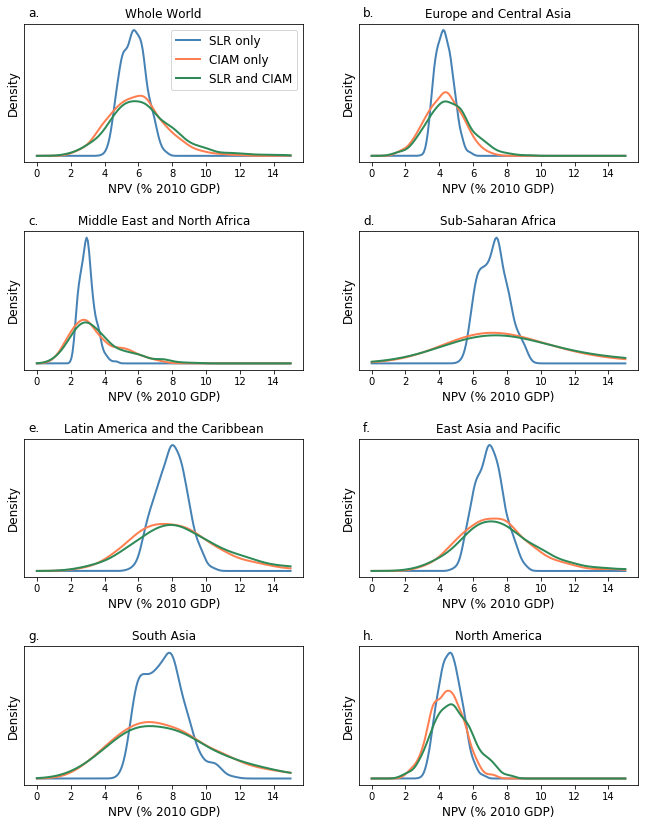

In [22]:
# from above

fig, ax = plt.subplots(4,2,figsize=(11,14))
fig.subplots_adjust(hspace=.5)
bins = range(0,20,1)
panels = ["a.","b.","c.","d.","e.","f.","g.","h."]

# whole world
rgn = "World"
pan = 0
ax[0][0].plot(x, kde_plot["S"][rgn], linewidth=2, color="steelblue", label="SLR only")
ax[0][0].plot(x, kde_plot["C"][rgn], linewidth=2, color="coral", label="CIAM only")
ax[0][0].plot(x, kde_plot["SC"][rgn], linewidth=2, color="seagreen", label="SLR and CIAM")
ax[0][0].set_xlabel("NPV (% 2010 GDP)", fontsize=12)
ax[0][0].set_ylabel("Density", fontsize=12); ax[0][0].set_yticks([])
ax[0][0].legend(fontsize=12, frameon=True)
ax[0][0].set_title("Whole World")
#ylims = ax[0][0].get_ylim(); top = ylims[1]+.05*(ylims[1]-ylims[0]); ax[0][0].text(-0.5,top,"a.", fontsize=12)
ylims = ax[0][0].get_ylim(); top = ylims[1]*1.05; ax[0][0].text(-0.5,top, panels[pan], fontsize=12);

# regions
rgn = regions[0]
pan += 1
ax[0][1].plot(x, kde_plot["S"][rgn], linewidth=2, color="steelblue", label="SLR only")
ax[0][1].plot(x, kde_plot["C"][rgn], linewidth=2, color="coral", label="CIAM only")
ax[0][1].plot(x, kde_plot["SC"][rgn], linewidth=2, color="seagreen", label="SLR and CIAM")
ax[0][1].set_xlabel("NPV (% 2010 GDP)", fontsize=12)
ax[0][1].set_ylabel("Density", fontsize=12); ax[0][1].set_yticks([])
ax[0][1].set_title(rgn)
ylims = ax[0][1].get_ylim(); top = ylims[1]*1.05; ax[0][1].text(-0.5,top, panels[pan], fontsize=12);

ir = 1
for row in range(1,4):
    for col in range(2):
        rgn = regions[ir]
        ir += 1
        pan += 1
        ax[row][col].plot(x, kde_plot["S"][rgn], linewidth=2, color="steelblue", label="SLR only")
        ax[row][col].plot(x, kde_plot["C"][rgn], linewidth=2, color="coral", label="CIAM only")
        ax[row][col].plot(x, kde_plot["SC"][rgn], linewidth=2, color="seagreen", label="SLR and CIAM")
        ax[row][col].set_xlabel("NPV (% 2010 GDP)", fontsize=12)
        ax[row][col].set_ylabel("Density", fontsize=12); ax[row][col].set_yticks([])
        ax[row][col].set_title(rgn)
        ylims = ax[row][col].get_ylim(); top = ylims[1]*1.05; ax[row][col].text(-0.5,top, panels[pan], fontsize=12);

fig.savefig(plotdir+"/regional_damages_ssp5-rcp85.pdf", bbox_inches='tight')

Regional numbers

In [23]:
print("5th, 50th, 95th, and 95-5th percentiles")
for rgn in regions:
    print("====================================================")
    print(rgn)
    print("SLR-only ensemble:     ",np.round([dfS["npv/gpd "+rgn].quantile(.05), dfS["npv/gpd "+rgn].quantile(.5), dfS["npv/gpd "+rgn].quantile(.95), dfS["npv/gpd "+rgn].quantile(.95)-dfS["npv/gpd "+rgn].quantile(.05)], 2))
    print("CIAM-only ensemble:    ",np.round([dfC["npv/gpd "+rgn].quantile(.05), dfC["npv/gpd "+rgn].quantile(.5), dfC["npv/gpd "+rgn].quantile(.95), dfC["npv/gpd "+rgn].quantile(.95)-dfC["npv/gpd "+rgn].quantile(.05)], 2))
    print("SLR and CIAM ensemble: ",np.round([dfSC["npv/gpd "+rgn].quantile(.05), dfSC["npv/gpd "+rgn].quantile(.5), dfSC["npv/gpd "+rgn].quantile(.95), dfSC["npv/gpd "+rgn].quantile(.95)-dfSC["npv/gpd "+rgn].quantile(.05)], 2))

5th, 50th, 95th, and 95-5th percentiles
Europe and Central Asia
SLR-only ensemble:      [3.51 4.27 5.15 1.64]
CIAM-only ensemble:     [2.49 4.32 6.06 3.58]
SLR and CIAM ensemble:  [2.59 4.52 6.8  4.21]
Middle East and North Africa
SLR-only ensemble:      [2.34 2.95 3.79 1.45]
CIAM-only ensemble:     [1.58 3.11 6.17 4.59]
SLR and CIAM ensemble:  [1.57 3.25 6.73 5.16]
Sub-Saharan Africa
SLR-only ensemble:      [5.93 7.22 8.65 2.71]
CIAM-only ensemble:     [ 3.95  7.78 20.67 16.72]
SLR and CIAM ensemble:  [ 3.93  7.94 24.25 20.32]
Latin America and the Caribbean
SLR-only ensemble:      [6.41 7.95 9.42 3.01]
CIAM-only ensemble:     [ 4.47  7.98 13.12  8.65]
SLR and CIAM ensemble:  [ 4.59  8.34 14.43  9.84]
East Asia and Pacific
SLR-only ensemble:      [5.64 6.94 8.37 2.73]
CIAM-only ensemble:     [ 4.33  7.19 11.23  6.9 ]
SLR and CIAM ensemble:  [ 4.22  7.41 12.13  7.91]
South Asia
SLR-only ensemble:      [5.71 7.46 9.71 4.  ]
CIAM-only ensemble:     [ 3.61  7.45 14.16 10.55]
SLR and CIAM 

## Check quantiles as sample size changes

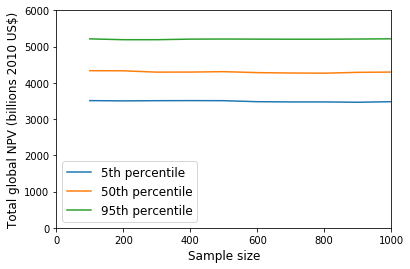

In [29]:
sample_sizes = np.arange(start=100,stop=1100,step=100)
quantiles = np.zeros((len(sample_sizes),3))
for ii in range(len(sample_sizes)):
    quantiles[ii,0] = dfS[:sample_sizes[ii]]["npv"].quantile(.05)
    quantiles[ii,1] = dfS[:sample_sizes[ii]]["npv"].quantile(.5)
    quantiles[ii,2] = dfS[:sample_sizes[ii]]["npv"].quantile(.95)

fig, ax = plt.subplots(1,1,figsize=(6,4))
plt.plot(sample_sizes, quantiles[:,0], label="5th percentile")
plt.plot(sample_sizes, quantiles[:,1], label="50th percentile")
plt.plot(sample_sizes, quantiles[:,2], label="95th percentile")
plt.xlim([0,1000]); plt.ylim([0,6000])
plt.xlabel("Sample size", fontsize=12); plt.ylabel("Total global NPV (billions 2010 US$)", fontsize=12)
plt.legend(loc="best", fontsize=12)
fig.savefig(plotdir+"/quantiles_sample_size.pdf", bbox_inches='tight');